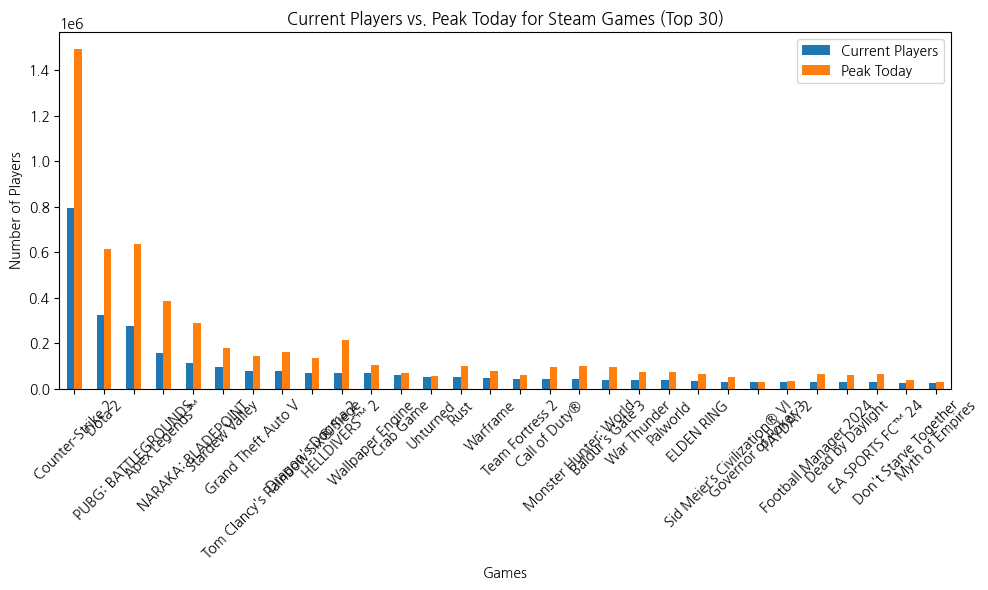

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 처음부터 30번째 행까지의 데이터를 읽어옵니다.
df = pd.read_csv('steam_games.csv', nrows=30)

# 게임 이름을 인덱스로 설정합니다.
df.set_index('Game Name', inplace=True)

# 현재 플레이어 수와 오늘의 최대 플레이어 수를 숫자로 변환합니다.
df['Current Players'] = df['Current Players'].str.replace(',', '').astype(int)
df['Peak Today'] = df['Peak Today'].str.replace(',', '').astype(int)

# 막대 그래프를 그립니다.
df.plot(kind='bar', figsize=(10, 6))
plt.title('Current Players vs. Peak Today for Steam Games (Top 30)')
plt.xlabel('Games')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## CLUSTERMAP

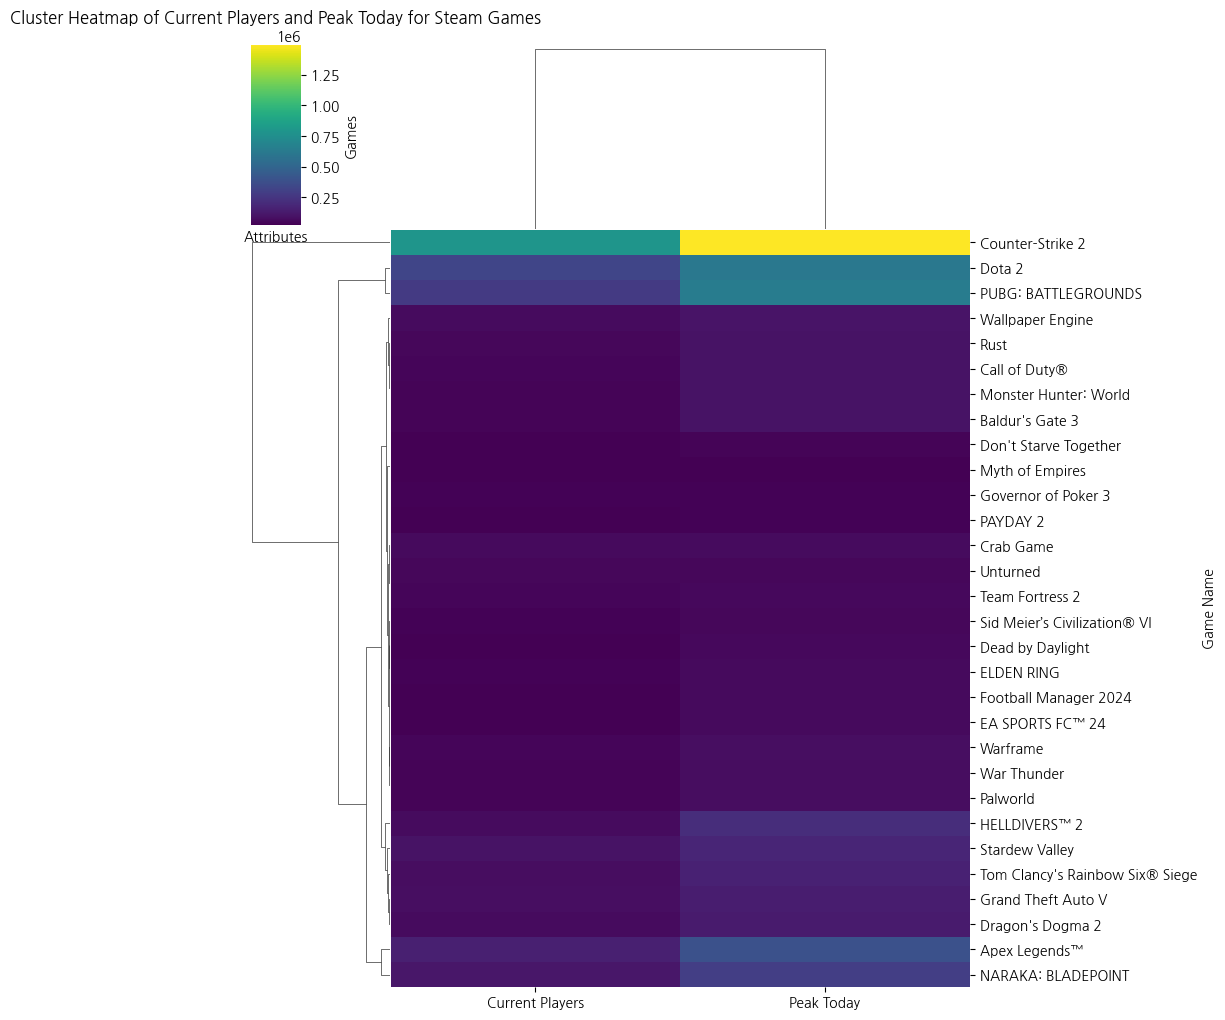

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일에서 데이터를 읽어옵니다.
df = pd.read_csv('steam_games.csv', nrows=30)

# 게임 이름을 인덱스로 설정합니다.
df.set_index('Game Name', inplace=True)

# 현재 플레이어 수와 오늘의 최대 플레이어 수를 숫자로 변환합니다.
df['Current Players'] = df['Current Players'].str.replace(',', '').astype(int)
df['Peak Today'] = df['Peak Today'].str.replace(',', '').astype(int)

# 클러스터 히트맵을 그립니다.
sns.clustermap(df, cmap='viridis', figsize=(10, 10))
plt.title('Cluster Heatmap of Current Players and Peak Today for Steam Games')
plt.xlabel('Attributes')
plt.ylabel('Games')
plt.show()

## HEATMAP

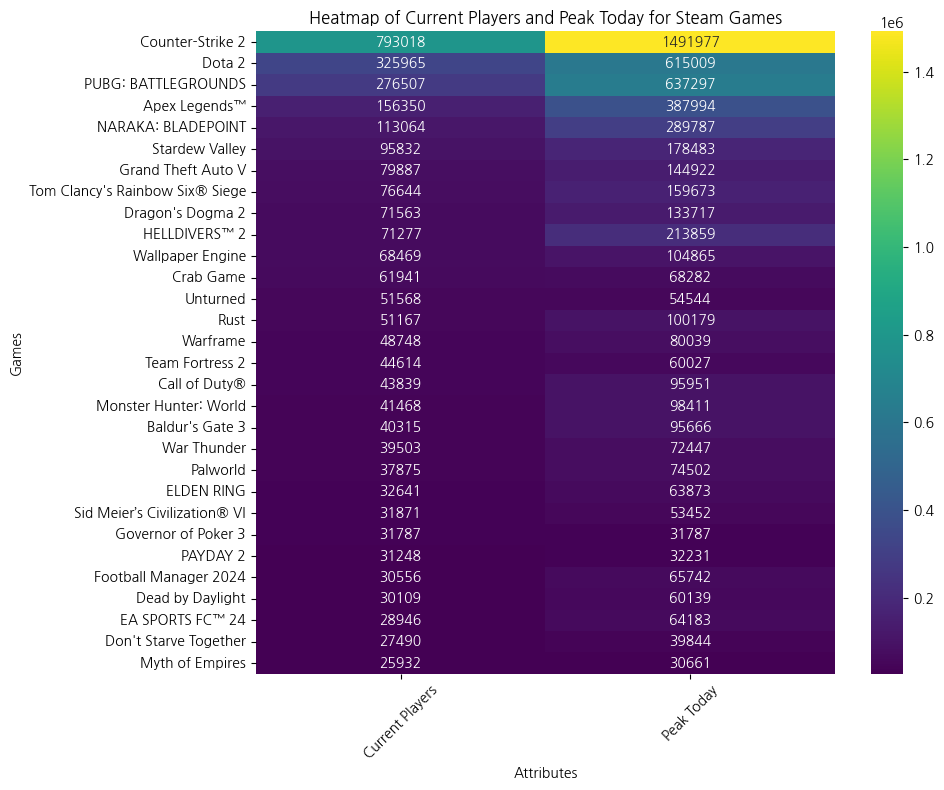

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일에서 데이터를 읽어옵니다.
df = pd.read_csv('steam_games.csv', nrows=30)

# 데이터프레임의 'Game Name' 열을 인덱스로 설정합니다.
df.set_index('Game Name', inplace=True)

# 'Current Players'와 'Peak Today' 열의 데이터 타입을 숫자로 변환합니다.
df['Current Players'] = df['Current Players'].str.replace(',', '').astype(int)
df['Peak Today'] = df['Peak Today'].str.replace(',', '').astype(int)

# 히트맵을 그립니다.
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap='viridis', annot=True, fmt="d")
plt.title('Heatmap of Current Players and Peak Today for Steam Games')
plt.xlabel('Attributes')
plt.ylabel('Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## FACET GRID

<>:7: SyntaxWarning: invalid escape sequence '\J'
<>:8: SyntaxWarning: invalid escape sequence '\K'
<>:7: SyntaxWarning: invalid escape sequence '\J'
<>:8: SyntaxWarning: invalid escape sequence '\K'
C:\Users\MSI\AppData\Local\Temp\ipykernel_22284\1861683587.py:7: SyntaxWarning: invalid escape sequence '\J'
  jyj_data = pd.read_csv('..\JYJ\steam_games_TopSeller_bak.csv', nrows=30)
C:\Users\MSI\AppData\Local\Temp\ipykernel_22284\1861683587.py:8: SyntaxWarning: invalid escape sequence '\K'
  ksh_data = pd.read_csv('..\KSH\youtube_games.csv')


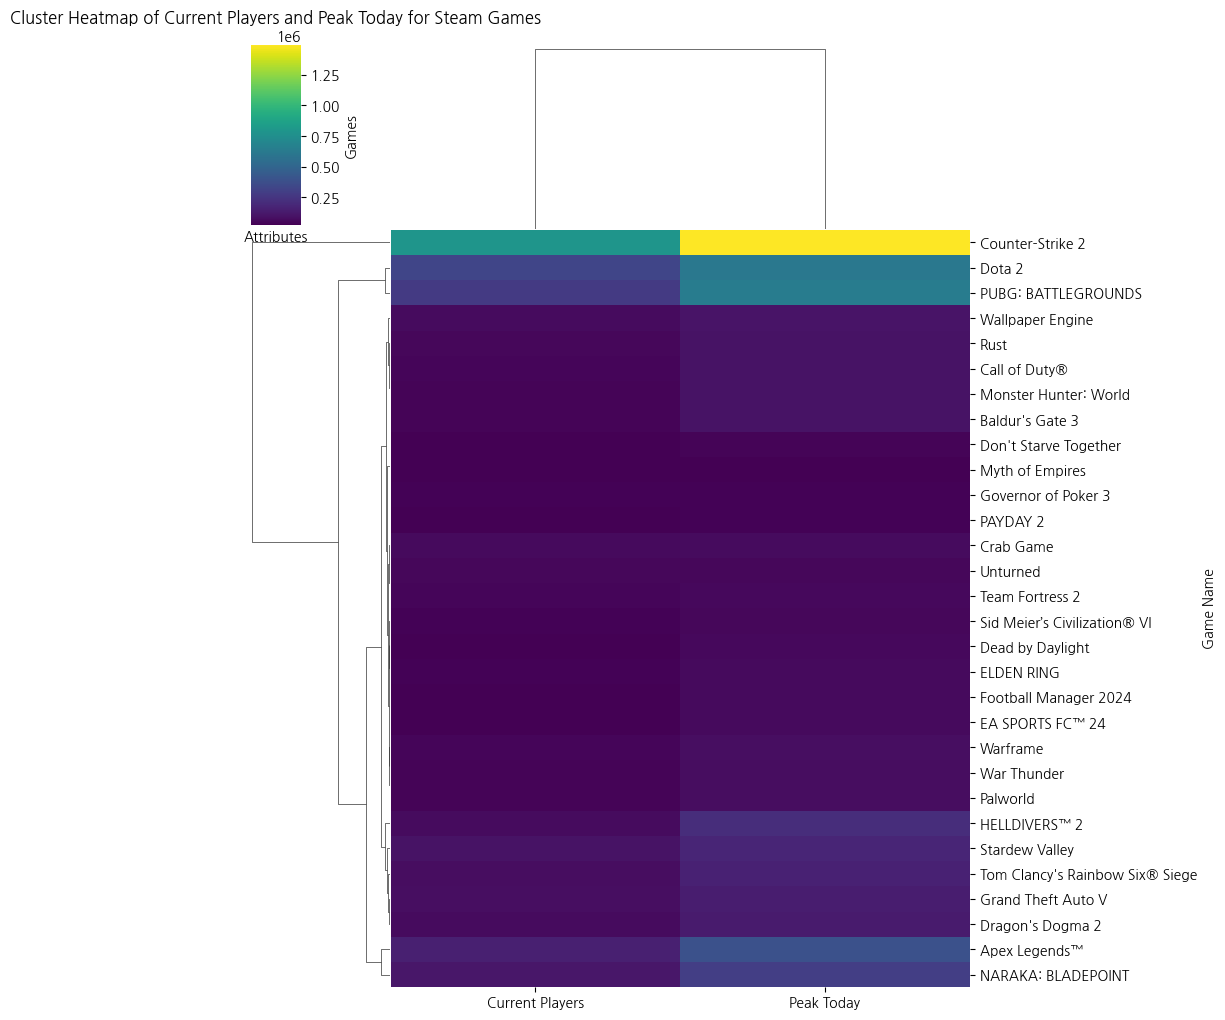

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일에서 데이터를 읽어옵니다.
jmk_data = pd.read_csv('steam_games.csv', nrows=30)
jyj_data = pd.read_csv('..\JYJ\steam_games_TopSeller_bak.csv', nrows=30)
ksh_data = pd.read_csv('..\KSH\youtube_games.csv')

# 게임 이름을 인덱스로 설정합니다.
jmk_data.set_index('Game Name', inplace=True)

# 현재 플레이어 수와 오늘의 최대 플레이어 수를 숫자로 변환합니다.
jmk_data['Current Players'] = jmk_data['Current Players'].str.replace(',', '').astype(int)
jmk_data['Peak Today'] = jmk_data['Peak Today'].str.replace(',', '').astype(int)

# 클러스터 히트맵을 그립니다.
sns.clustermap(jmk_data, cmap='viridis', figsize=(10, 10))
plt.title('Cluster Heatmap of Current Players and Peak Today for Steam Games')
plt.xlabel('Attributes')
plt.ylabel('Games')
plt.show()



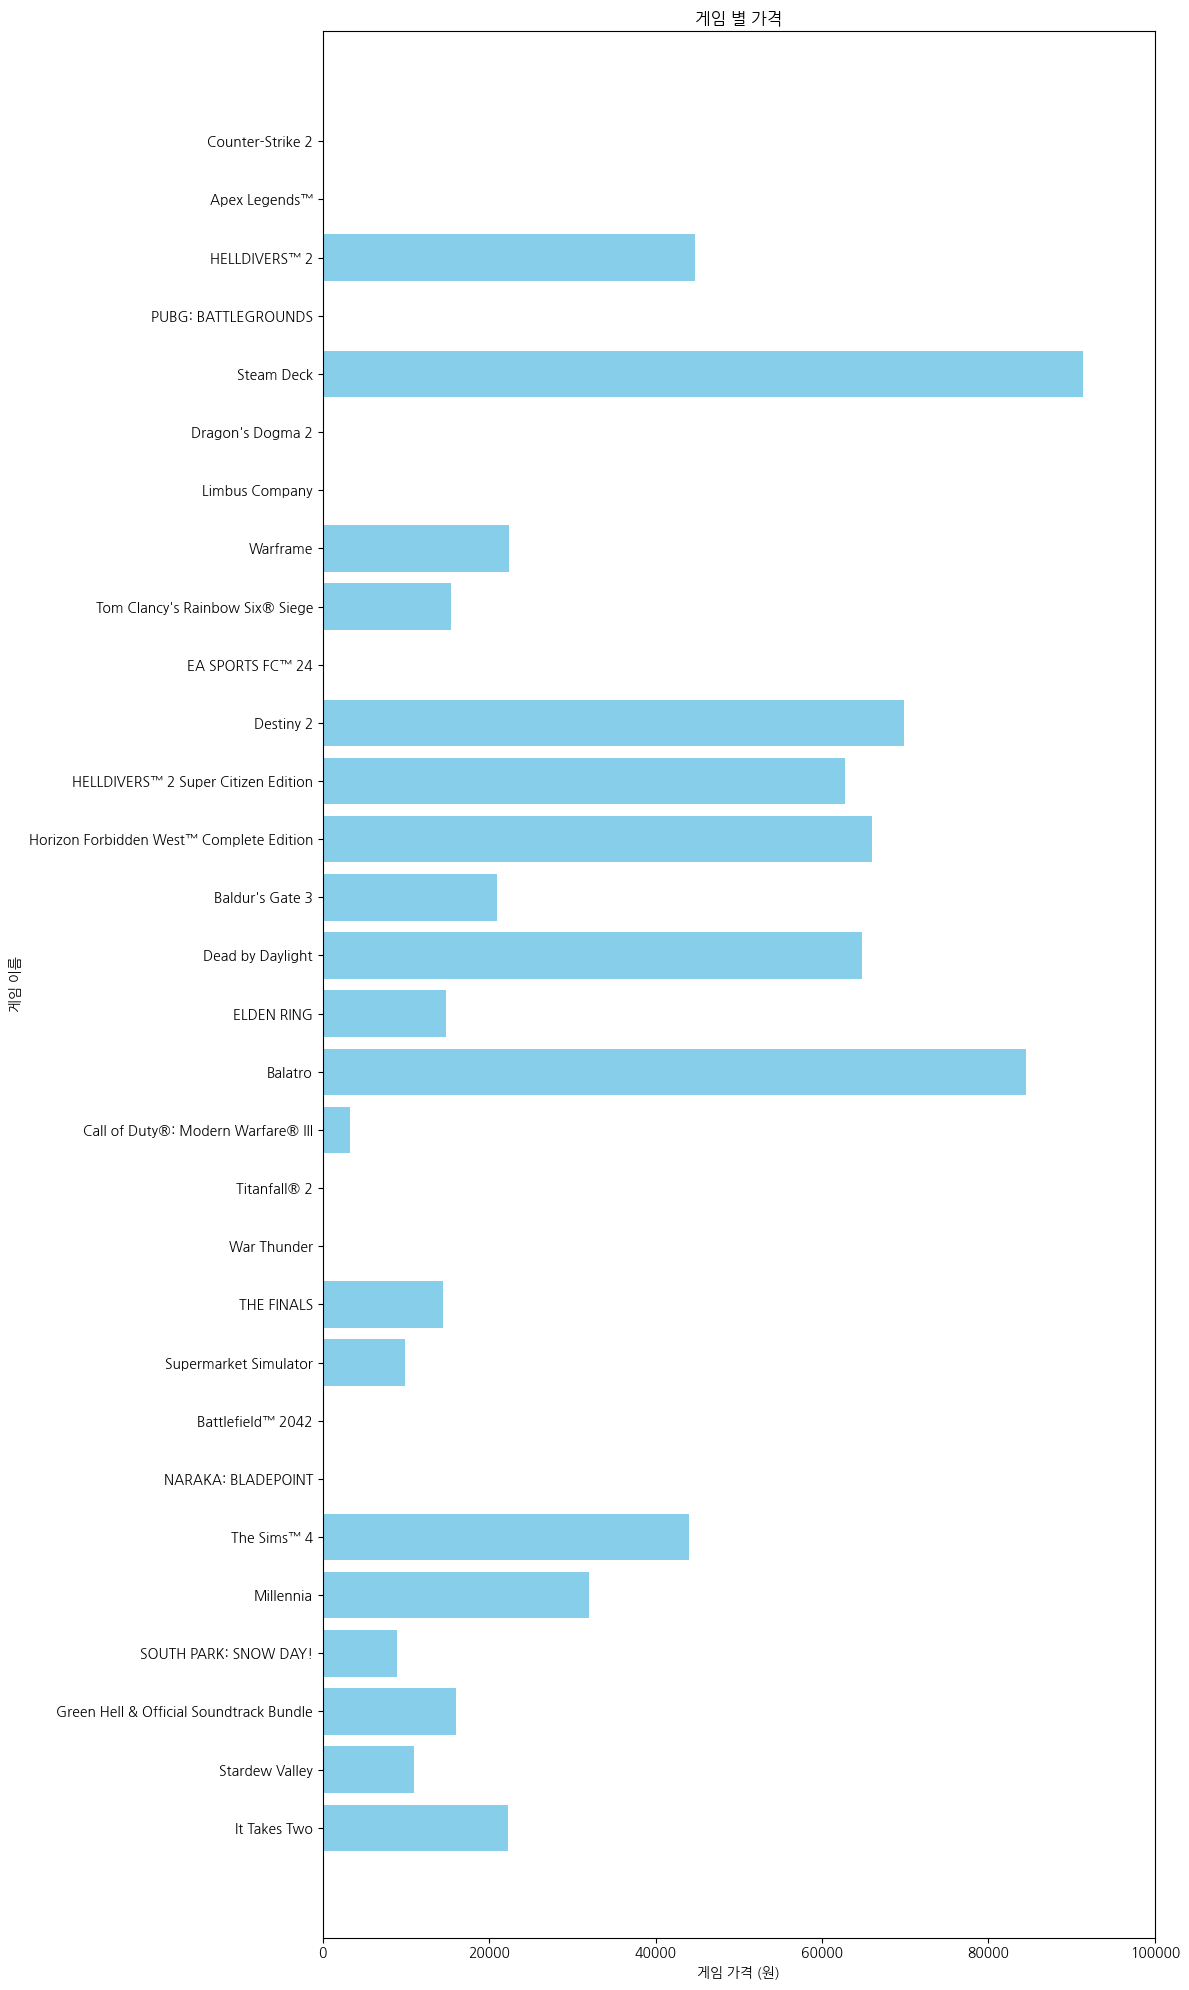

In [56]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 준비
games = jyj_data['게임 이름']
prices = jyj_data['게임 가격']



# 가격을 숫자로 변환하고 스케일링
price_values = []
for price in prices:
    if price == 'Free To Play' or price == 'Prepurchase':
        price_values.append(0)
    else:
        price_values.append(float(price.replace('₩', '').replace(',', '')))

# 그래프 생성
plt.figure(figsize=(12, 20))
plt.barh(games, price_values, color='skyblue')
plt.xlabel('게임 가격 (원)')
plt.ylabel('게임 이름')
plt.title('게임 별 가격')
plt.xlim(0, 100000)  # y 축 범위 설정
plt.gca().invert_yaxis()  # 그래프 방향 뒤집기
plt.tight_layout()  # 그래프 간격 조정
plt.show()

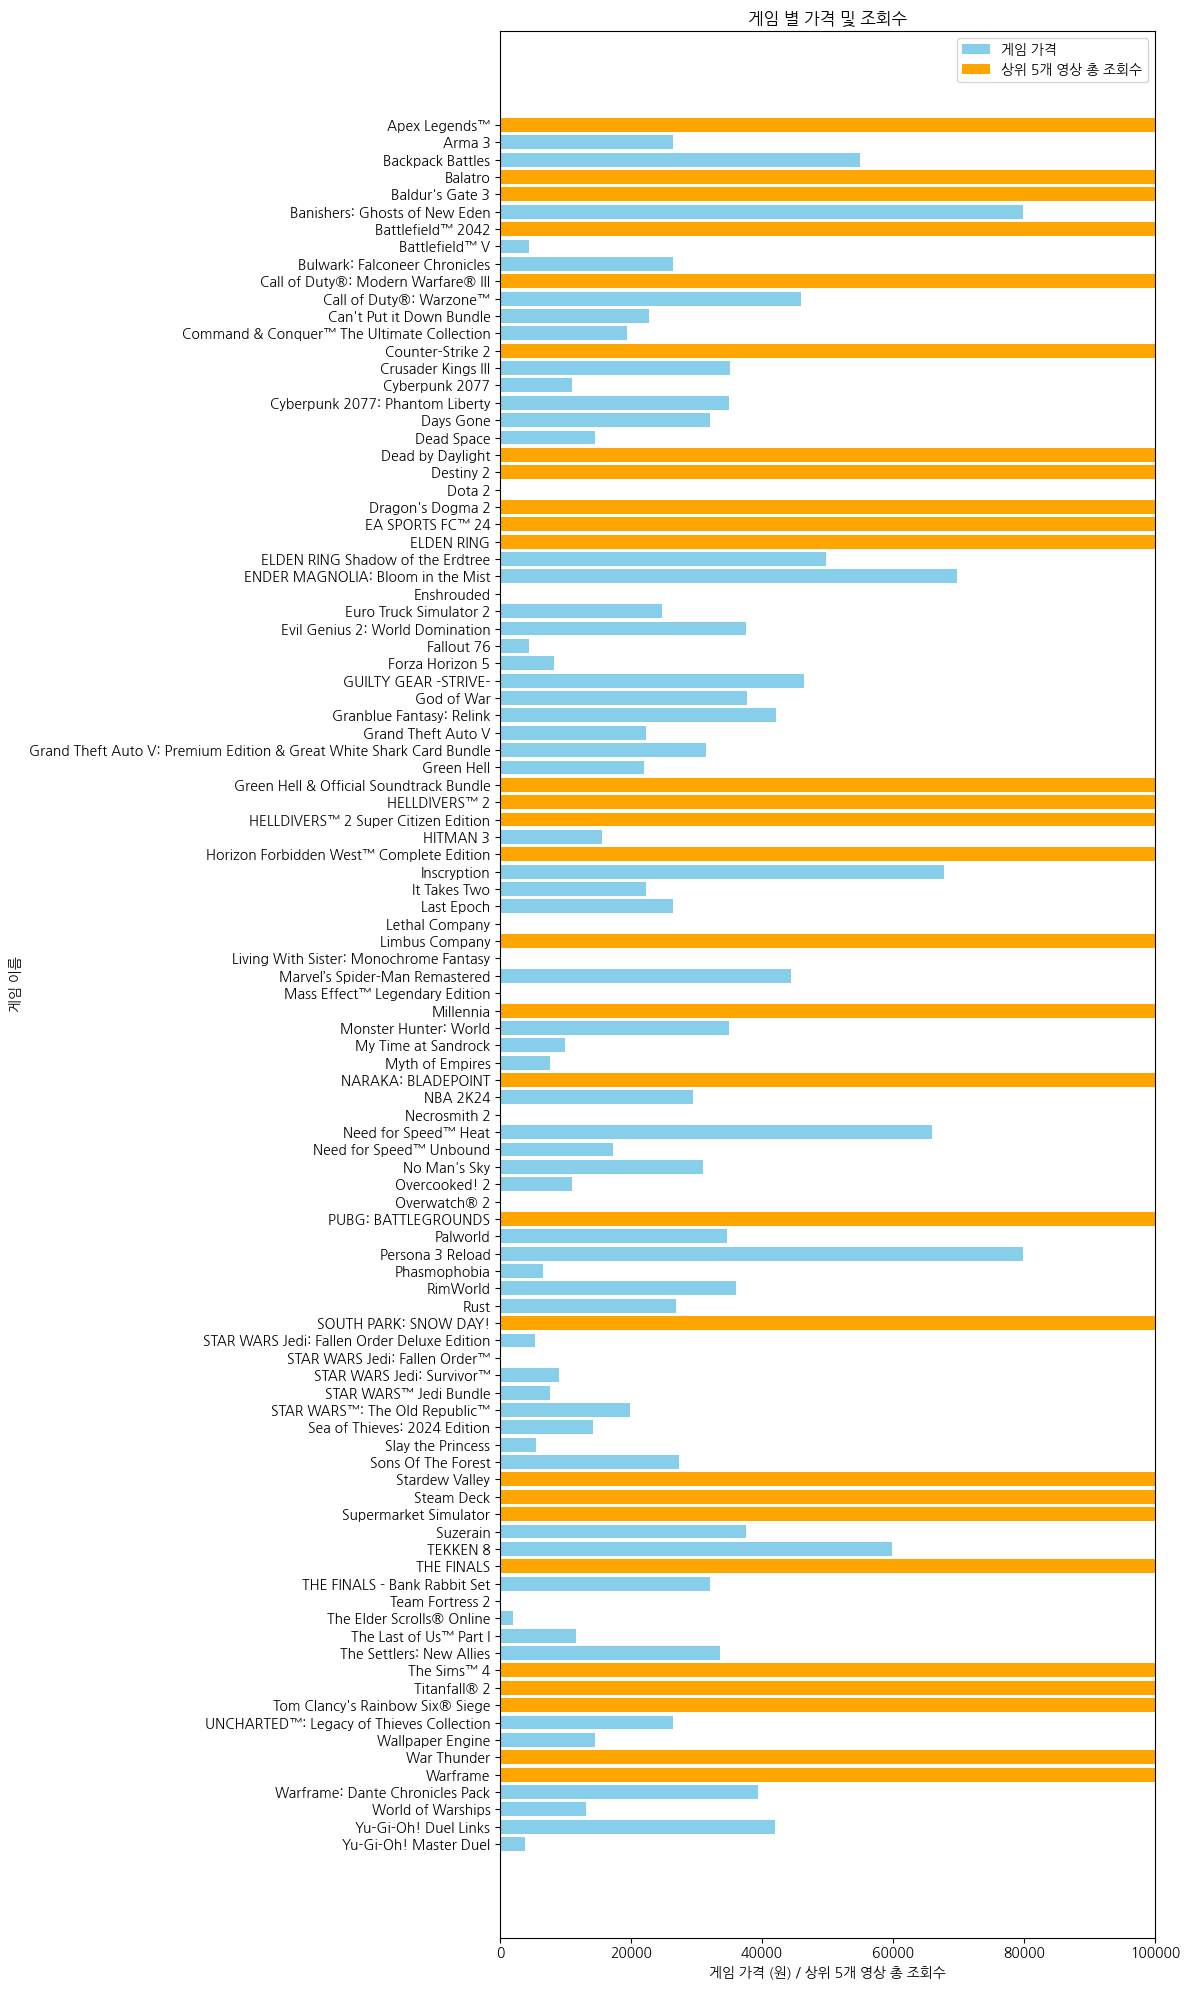

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 로드
jyj_data = pd.read_csv('../JYJ/steam_games_TopSeller_bak.csv', encoding='utf-8')
youtube_data = pd.read_csv('../KSH/youtube_games.csv', encoding='utf-8')

# 데이터 결합
merged_data = pd.merge(jyj_data, youtube_data, on='게임 이름', how='outer')

# 결측치가 아닌 데이터만 필터링
merged_data_filtered = merged_data.dropna(subset=['게임 가격'])

# 가격 및 조회수 처리 및 스케일링
price_values = []
for price in merged_data_filtered['게임 가격']:
    if price == 'Free To Play' or price == 'Prepurchase':
        price_values.append(0)
    else:
        price_values.append(float(price.replace('₩', '').replace(',', '')))

view_count_values = merged_data_filtered['상위 5개 영상 총 조회수'].fillna(0).astype(int)

# 그래프 생성
plt.figure(figsize=(12, 20))
plt.barh(merged_data_filtered['게임 이름'], price_values, color='skyblue', label='게임 가격')
plt.barh(merged_data_filtered['게임 이름'], view_count_values, color='orange', label='상위 5개 영상 총 조회수')
plt.xlabel('게임 가격 (원) / 상위 5개 영상 총 조회수')
plt.ylabel('게임 이름')
plt.title('게임 별 가격 및 조회수')
plt.xlim(0, 100000)  # y 축 범위 설정
plt.gca().invert_yaxis()  # 그래프 방향 뒤집기
plt.legend()
plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [ ]:
print(merged_data.columns)

Index(['게임 이름', '게임 가격', '상위 5개 영상 총 조회수'], dtype='object')
